# Importing Libraries

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from skopt import BayesSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load Processed Data

In [4]:
df = pd.read_csv('../data/processed.csv')

In [5]:
df.head()

,Company,TypeName,Ram,TouchScreen,IPS,PPI,CPU brand,CPU clock speed,Gpu,HDD,SSD,Flash_Storage,Operating_System,Weight,Price_euros
0,Apple,Ultrabook,8,0,1,226.983005,Intel Core i5,2.3,Intel,0.0,128.0,0.0,MacOS,1.37,1339.69
1,Apple,Ultrabook,8,0,0,127.677940,Intel Core i5,1.8,Intel,0.0,0.0,128.0,MacOS,1.34,898.94
2,HP,Notebook,8,0,0,141.211998,Intel Core i5,2.5,Intel,0.0,256.0,0.0,Other OS/No OS,1.86,575.00
3,Apple,Ultrabook,16,0,1,220.534624,Intel Core i7,2.7,AMD,0.0,512.0,0.0,MacOS,1.83,2537.45
4,Apple,Ultrabook,8,0,1,226.983005,Intel Core i5,3.1,Intel,0.0,256.0,0.0,MacOS,1.37,1803.60


# Train-Test Split

In [6]:
X = df.drop('Price_euros',axis=1)
y = df['Price_euros']

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
X_train

,Company,TypeName,Ram,TouchScreen,IPS,PPI,CPU brand,CPU clock speed,Gpu,HDD,SSD,Flash_Storage,Operating_System,Weight
147,Asus,Notebook,4,0,0,141.211998,Other Intel Processor,1.10,Intel,1000.0,0.0,0.0,Windows,2.00
342,HP,Notebook,8,0,1,141.211998,Intel Core i3,2.40,Nvidia,1000.0,0.0,0.0,Windows,2.10
1003,HP,Notebook,4,0,0,111.935204,Intel Core i5,2.50,Intel,500.0,0.0,0.0,Windows,1.64
814,Dell,Notebook,8,0,0,141.211998,Intel Core i5,2.50,AMD,0.0,256.0,0.0,Windows,2.18
344,Dell,Ultrabook,8,0,0,165.632118,Intel Core i7,1.80,Intel,0.0,256.0,0.0,Windows,1.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Acer,Notebook,8,0,0,141.211998,Intel Core i5,2.50,Nvidia,1000.0,256.0,0.0,Windows,2.40
1130,HP,Notebook,8,0,0,100.454670,Intel Core i7,2.70,Intel,2000.0,0.0,0.0,Windows,2.04
1294,Dell,Notebook,8,0,0,100.454670,Intel Core i7,2.70,AMD,1000.0,0.0,0.0,Linux,2.30
860,Lenovo,Notebook,8,0,1,141.211998,Intel Core i5,2.50,Intel,1000.0,0.0,0.0,Windows,2.30


In [9]:
X_test

,Company,TypeName,Ram,TouchScreen,IPS,PPI,CPU brand,CPU clock speed,Gpu,HDD,SSD,Flash_Storage,Operating_System,Weight
478,Dell,Notebook,8,0,0,141.211998,Intel Core i5,1.6,AMD,1000.0,0.0,0.0,Windows,2.20
724,MSI,Gaming,8,0,0,127.335675,Intel Core i7,2.8,Nvidia,1000.0,128.0,0.0,Windows,2.70
312,MSI,Gaming,16,0,1,141.211998,Intel Core i7,2.8,Nvidia,1000.0,256.0,0.0,Windows,2.80
851,Asus,Gaming,16,0,0,141.211998,Intel Core i7,2.8,Nvidia,1000.0,128.0,0.0,Windows,2.10
1275,Dell,Notebook,6,0,0,100.454670,Intel Core i3,2.4,Intel,1000.0,0.0,0.0,Windows,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,HP,Notebook,8,0,0,127.335675,Intel Core i7,1.8,Nvidia,0.0,256.0,0.0,Windows,2.50
296,Acer,Notebook,8,0,0,141.211998,Intel Core i7,2.8,Nvidia,0.0,256.0,0.0,Linux,2.50
286,Lenovo,Notebook,8,0,1,141.211998,Intel Core i7,2.7,Intel,0.0,256.0,0.0,Windows,1.95
997,Acer,Notebook,4,0,0,100.454670,Other Intel Processor,1.1,Intel,500.0,0.0,0.0,Windows,2.40


In [10]:
y_train

147      344.00
342      716.00
1003     779.00
814      789.81
344     1579.00
         ...   
1095     799.00
1130     629.00
1294     805.99
860      850.66
1126     479.00
Name: Price_euros, Length: 1041, dtype: float64

In [11]:
y_test

478      675.00
724     1348.48
312     2099.00
851     1899.00
1275     459.00
         ...   
199     1045.00
296      979.00
286     1097.00
997      380.00
10       393.90
Name: Price_euros, Length: 261, dtype: float64

# Define Preprocessor

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1302 non-null   object 
 1   TypeName          1302 non-null   object 
 2   Ram               1302 non-null   int64  
 3   TouchScreen       1302 non-null   int64  
 4   IPS               1302 non-null   int64  
 5   PPI               1302 non-null   float64
 6   CPU brand         1302 non-null   object 
 7   CPU clock speed   1302 non-null   float64
 8   Gpu               1302 non-null   object 
 9   HDD               1302 non-null   float64
 10  SSD               1302 non-null   float64
 11  Flash_Storage     1302 non-null   float64
 12  Operating_System  1302 non-null   object 
 13  Weight            1302 non-null   float64
 14  Price_euros       1302 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 152.7+ KB


In [13]:
numeric_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [14]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Define Model Parameters

In [15]:
model_params = {
    'ridge': (
        Ridge(),
        {
            'regressor__alpha': (0.01,100.0,'log-uniform')
        }
    ),
    'lasso': (
        Lasso(),
        {
            'regressor__alpha': (0.0001,1.0,'log-uniform')
        }
    ),
    'svr': (
        SVR(),
        {
            'regressor__C': (0.1,10.0,'log-uniform'),
            'regressor__epsilon': (0.01,1.0,'log-uniform'),
            'regressor__kernel': ('linear','rbf','sigmoid')
        }
    ),
    'xgb': (
        XGBRegressor(random_state=42),
        {
            'regressor__n_estimators': (100,300),
            'regressor__max_depth': (4,10),
            'regressor__learning_rate': (0.01,0.3,'log-uniform'),
            'regressor__subsample': (0.6,1.0)
        }
    ),
    'gbr': (
        GradientBoostingRegressor(random_state=42),
        {
            'regressor__n_estimators': (100,300),
            'regressor__max_depth': (4,10),
            'regressor__learning_rate': (0.01,0.3,'log-uniform')
        }
    ),
    'rf': (
        RandomForestRegressor(random_state=42),
        {
            'regressor__n_estimators': (100,300),
            'regressor__max_depth': (4,25)
        }
    )
} 

# Tune each model using BayesSearchCV

In [16]:
best_models = {}
for name,(model,params) in model_params.items():
    print(f"\nTuning {name}...")
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('regressor', model)
    ])
    opt = BayesSearchCV(
        estimator = pipe,
        search_spaces = params,
        n_iter = 20,
        cv = 3,
        scoring = 'neg_mean_squared_error',
        n_jobs = -1,
        random_state = 42
    )
    opt.fit(X,y)
    print(f"Best params for {name}:{opt.best_params_}")
    best_models[name] = opt.best_estimator_


Tuning ridge...
Best params for ridge:OrderedDict({'regressor__alpha': 2.2252237250677775})

Tuning lasso...
Best params for lasso:OrderedDict({'regressor__alpha': 0.5056122235494306})

Tuning svr...
Best params for svr:OrderedDict({'regressor__C': 10.0, 'regressor__epsilon': 0.01, 'regressor__kernel': 'linear'})

Tuning xgb...
Best params for xgb:OrderedDict({'regressor__learning_rate': 0.06690071891014092, 'regressor__max_depth': 7, 'regressor__n_estimators': 300, 'regressor__subsample': 0.6139216684202068})

Tuning gbr...
Best params for gbr:OrderedDict({'regressor__learning_rate': 0.18430351724821326, 'regressor__max_depth': 4, 'regressor__n_estimators': 100})

Tuning rf...
Best params for rf:OrderedDict({'regressor__max_depth': 25, 'regressor__n_estimators': 100})



C:\Users\ANIKET\anaconda3\envs\deep_learning\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.29999999999999993, 4, 100] before, using random point [0.05684426133725288, 4, 208]
  warnings.warn(


Best params for gbr:OrderedDict({'regressor__learning_rate': 0.18430351724821326, 'regressor__max_depth': 4, 'regressor__n_estimators': 100})

Tuning rf...


C:\Users\ANIKET\anaconda3\envs\deep_learning\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [25, 100] before, using random point [18, 187]
  warnings.warn(
C:\Users\ANIKET\anaconda3\envs\deep_learning\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [25, 100] before, using random point [5, 289]
  warnings.warn(
C:\Users\ANIKET\anaconda3\envs\deep_learning\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [25, 100] before, using random point [18, 224]
  warnings.warn(
C:\Users\ANIKET\anaconda3\envs\deep_learning\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [25, 100] before, using random point [18, 209]
  warnings.warn(


Best params for rf:OrderedDict({'regressor__max_depth': 25, 'regressor__n_estimators': 100})


# Combine in Voting Regressor

In [17]:
voting_reg = VotingRegressor(estimators=[
    (name,model) for name,model in best_models.items()
])

In [18]:
voting_reg.fit(X_train,y_train)

VotingRegressor(estimators=[('ridge',
                             Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['Ram',
                                                                                'TouchScreen',
                                                                                'IPS',
                                                                                'PPI',
                                                                                'CPU '
                                                                                'clock '
                                                                                'speed',
                                                                                'HDD',
                                                                                'SSD',
                                                                                'Flash_Storage',
                                                                                'Weight']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Company',
                                                                                'TypeName',
                                                                                'CPU '
                                                                                'brand',
                                                                                'Gpu',
                                                                                'Operating_System'])])),
                                             ('regressor',
                                              Ridge(alpha...
                             Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['Ram',
                                                                                'TouchScreen',
                                                                                'IPS',
                                                                                'PPI',
                                                                                'CPU '
                                                                                'clock '
                                                                                'speed',
                                                                                'HDD',
                                                                                'SSD',
                                                                                'Flash_Storage',
                                                                                'Weight']),
                                                                              ('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Company',
                                                                                'TypeName',
                                                                                'CPU '
                                                                                'brand',
                                                                    

# Evaluate

In [19]:
y_pred = voting_reg.predict(X_test)

In [20]:
mse = mean_squared_error(y_test,y_pred)
r2score = r2_score(y_test,y_pred)
print(f"Mean Squared Error:{mse:.3f}")
print(f"R2 score:{r2score:.3f}")

Mean Squared Error:81236.243
R2 score:0.839


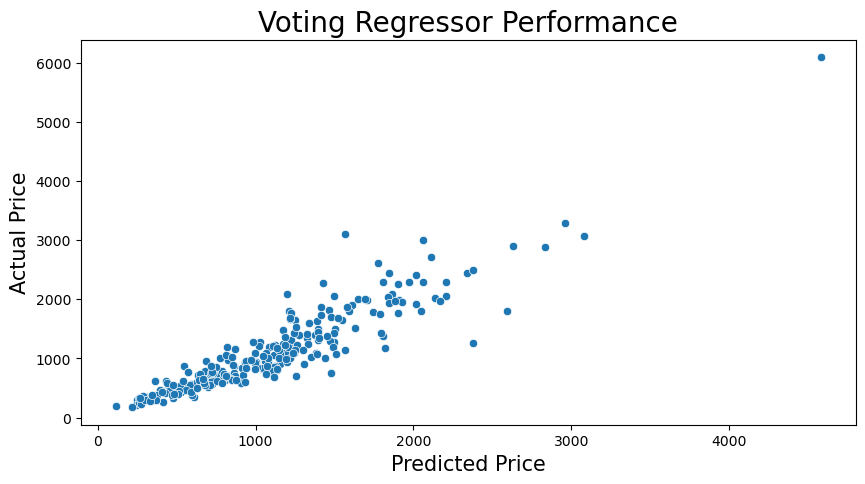

In [25]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_pred,y=y_test)
plt.xlabel('Predicted Price',fontsize=15)
plt.ylabel('Actual Price',fontsize=15)
plt.title("Voting Regressor Performance",fontsize=20)
plt.show()

# Save the Model

In [26]:
pickle.dump(voting_reg,open("../model/model.pkl","wb"))